In [4]:
import numpy as np
import matplotlib.pyplot as plt
import watson_dst.watson_distribution as watson
import scipy.stats

/home/zhao/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1083: VisibleDeprecationWarning: The signature of <bound method DimrothWatson._rvs of <watson_dst.watson_distribution.DimrothWatson object at 0x7f6a4f899b20>> does not contain a "size" keyword.  Such signatures are deprecated.
  warnings.warn(


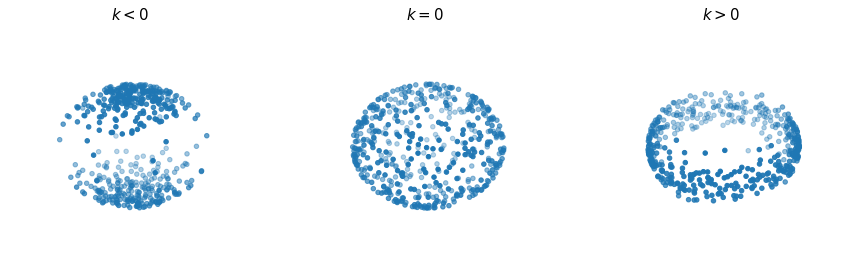

In [6]:
rv = watson.DimrothWatson()

# set up a figure
fig = plt.figure(figsize=(15.0,4.5))


# sample polar coordimnates
theta = np.arccos(rv.rvs(k=-5, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title(r'$k<0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# sample polar coordimnates
theta = np.arccos(rv.rvs(k=0, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title(r'$k=0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

# sample polar coordimnates
theta = np.arccos(rv.rvs(k=10, size=500))
phi = np.random.random(size=500)*np.pi*2

# cartesian coordinates of the unit sphere
r = 1.0
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title(r'$k>0$', fontsize=15)
ax.scatter(x, y, z)
ax.set_axis_off()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

plt.show()

Text(0, 0.5, 'y')

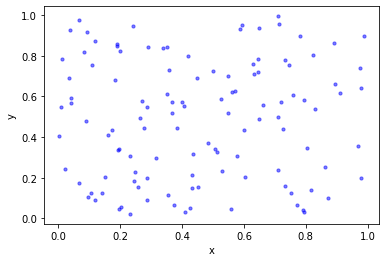

In [12]:
#Simulation window parameters
xMin=0;xMax=1;
yMin=0;yMax=1;
xDelta=xMax-xMin;yDelta=yMax-yMin; #rectangle dimensions
areaTotal=xDelta*yDelta;
 
#Point process parameters
lambda0=100; #intensity (ie mean density) of the Poisson process
 
#Simulate Poisson point process
numbPoints = scipy.stats.poisson( lambda0*areaTotal ).rvs()#Poisson number of points
xx = xDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+xMin#x coordinates of Poisson points
yy = yDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+yMin#y coordinates of Poisson points
#Plotting
plt.scatter(xx,yy, s=10, edgecolor='b', facecolor='b', alpha=0.5 )
plt.xlabel("x"); plt.ylabel("y")

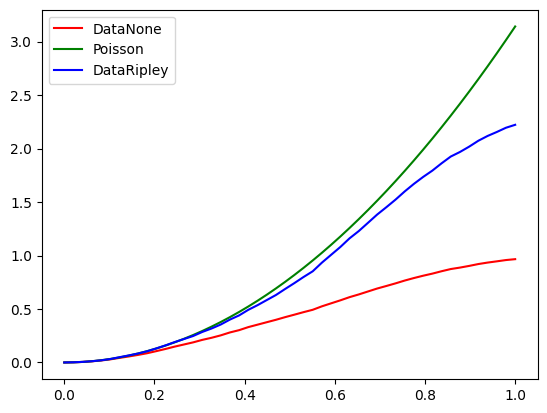

In [5]:
data = list(zip(xx[:,0], yy[:,0]))
r = np.linspace(0, 1, 50)

# total distance between all points n * (n-1) / 2
Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)

plt.plot(r, Kest(data=data, radii=r, mode='none'), color='red', label='DataNone') #without correction
plt.plot(r, Kest.poisson(r), color='green', label='Poisson')
plt.plot(r, Kest(data=data, radii=r, mode='ripley'), color='blue', label='DataRipley')
plt.legend()
plt.show()

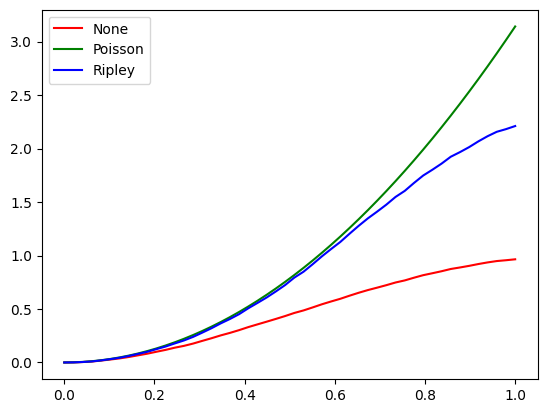

In [6]:
rng = np.random.default_rng()
data2 = rng.random((100, 2))
plt.plot(r, Kest(data=data2, radii=r, mode='none'), color='red', label='None')
plt.plot(r, Kest.poisson(r), color='green', label='Poisson')
plt.plot(r, Kest(data=data2, radii=r, mode='ripley'), color='blue', label='Ripley')
plt.legend()
plt.show()